# The following JupyterNotebook has been created to try to answer the following three questions, based on the data gathered in the 2019 Stack Overflow questionnaire.

Interesting questions that I want to answer using this analysis:

## 1. Most desired languages by developers?
## 2. Which programming languages have the biggest impact on salary?
## 3. Influence of different factors on job satisfaction?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
get_ipython().run_line_magic('matplotlib', 'inline')
# Loading data together with the table schema for inference
# Changing the number of rows and columsn displayed for easier investigationg
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 180)
#     Loading the data from the 2019 survey and the table schema

df = pd.read_csv('C:\\Users\\SWOZNIA\\survey_results_public.csv')
schema = pd.read_csv('C:\\Users\\SWOZNIA\\survey_results_schema.csv')
# Check the schema
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [5]:
# Create a dataframe to work on in relation to Languages developers would like to work next year
df_desired_languages = df.dropna(axis = 0, subset= ['LanguageDesireNextYear'])
df_desired_languages

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

# Question 1. Most desired languages by developers?

In [6]:
# Unpack the desired languages values from the questionnaire
desired_languages_value_list =[]
# Creating a desired languages list, going line by line over the interviewee answers in the dataframe,
# we are extracting the answers with the split function to check their value counts
for line in df_desired_languages['LanguageDesireNextYear']:
    line_length = (len(line.split(';')))
    line_list = line.split(';')
    for i in range(0, line_length):
        desired_languages_value_list.append(line_list[i].lstrip())
# Create a series out of the values list to work on more easily
df_desired_languages_series = pd.Series(desired_languages_value_list)

In [8]:
# Check which answers are most popular, percent wise
# The desired languages_series are all the values unpacked from the multiple chocie answers made by the respondents
round((df_desired_languages_series.value_counts()/sum(df_desired_languages_series.value_counts())*100),2)

JavaScript               11.24
Python                   10.05
HTML/CSS                  9.21
SQL                       8.43
TypeScript                5.96
Java                      5.91
C#                        5.64
Bash/Shell/PowerShell     5.35
Go                        4.29
C++                       4.23
Kotlin                    3.33
PHP                       3.22
C                         2.80
Rust                      2.64
Swift                     2.21
WebAssembly               2.12
Other(s):                 1.99
Ruby                      1.82
R                         1.69
Scala                     1.40
Assembly                  1.17
Dart                      1.11
Elixir                    0.95
F#                        0.88
Objective-C               0.72
Clojure                   0.69
Erlang                    0.53
VBA                       0.41
dtype: float64

#### Using the plot method to create a plot with a % represnentation of the most popular answers
#### The value is produced by taking the number of times a given value has been given an devide by the total number of answers

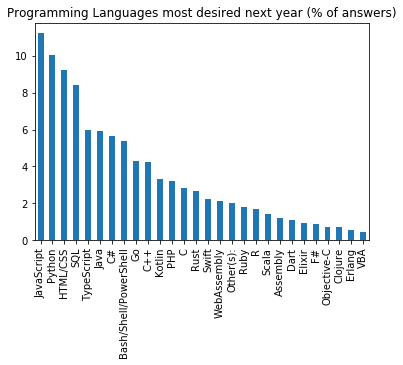

In [9]:
round((df_desired_languages_series.value_counts()/sum(df_desired_languages_series.value_counts())*100),2).plot(kind="bar",  title = "Programming Languages most desired next year (% of answers)", )
# Java Script/Python/HMTL/CSS as languages people would like to work the most on

# Question 2. Which programming languages have the biggest impact on salary?
First step is going to be choosing the columns that will be most interesting

In [10]:
# Retrieve the list of all text columns
all_category = df.select_dtypes(include = ['object']).columns
# Columns to unpack as they include_multiple_choice answers
columns_multiple_choice=['LanguageWorkedWith']
# Get rid of the reows for which the multiple choice columns that are of interest to us are NAN

df_multiple_choice_cleared = df.dropna(axis = 0, subset = columns_multiple_choice)

In [13]:
def unpack_multiple_choice (data_frame, column_name):

    '''
    
    INPUT:
    data_frame  - data_frame from which values will be unpacked
    column_name - column comprised of a mulitple choice answers that requires unpacking
    OUTPUT:
    data_frame - a dataframe holding the one-hot encoded values
    
    Provides a dataframe that has a multiple chocie variable one-hot encoded
    '''
    
    unpacked_value_list =[]
#     Unpack the values from the multiple choice column. Retrieve all the columns and extract all the values that are unique
# so that we could one-hot encode them
    for line in data_frame[column_name]:
        line_length = (len(line.split(';')))
        line_list = line.split(';')
        for i in range(0, line_length):
            unpacked_value_list.append(line_list[i].lstrip())
    unpacked_value_list_series = pd.Series(unpacked_value_list)
    unpacked_value_list_series_unique = unpacked_value_list_series.unique()
    
#     Create a zero filled array which will be used to note the values if chosen by the given interviewee
    value_rows = np.zeros((data_frame.shape[0],len(unpacked_value_list_series_unique)+ 1))
    
#     Create a dictionary for the values that can later be used to amend the zero array
    value_rows.shape
    dictionary_values_import = []
    for i in range(0, len(unpacked_value_list_series_unique)):
        dictionary_values_import.append(i)
        
# Create a dictionary that will play a role for localizing the zero-array column that neds to be updated

    unique_values_dictionary  = dict(list(zip(unpacked_value_list_series_unique,dictionary_values_import)))
    print(unique_values_dictionary)
    
# Add a respondent column to allow for an easier join
    unique_values_dictionary['Respondent'] = len(unique_values_dictionary)+ 1 
    current_row = -1

#     Unpack the column values into the zero array
    for line in data_frame[column_name]:
        line_length = (len(line.split(';')))
        line_list = line.split(';')
        current_row += 1
        value_rows[current_row,len(unpacked_value_list_series_unique) ] = data_frame['Respondent'].values[current_row]
        for i in range(0, line_length):
            current_item = line_list[i].lstrip()
            column_ref = unique_values_dictionary[current_item]
            value_rows[current_row,column_ref] = 1
    
#     Create a dataframe holding the values
    values_data_frame = pd.DataFrame(columns=unique_values_dictionary.keys(),data = value_rows)
    values_data_frame = values_data_frame.add_prefix(column_name + "_")
    
#   Get rid of the old column that has been one-hot encoded
    data_frame = data_frame.drop([column_name], axis = 1)
    values_data_frame = values_data_frame.rename(columns = ({column_name + '_' + 'Respondent': 'Respondent'}))
#   Merge the data_frame with the newly created values data frame. A joing performed on the Respondnet nr value

    data_frame = pd.merge(left=data_frame, right=values_data_frame, left_on='Respondent', right_on='Respondent')
    return data_frame

In [12]:
# Unpack the values from the multiple choice column and store them in an array
for column in (columns_multiple_choice):
    df_multiple_choice_cleared = unpack_multiple_choice(df_multiple_choice_cleared, column)


{'HTML/CSS': 0, 'Java': 1, 'JavaScript': 2, 'Python': 3, 'C++': 4, 'C': 5, 'C#': 6, 'SQL': 7, 'VBA': 8, 'R': 9, 'Bash/Shell/PowerShell': 10, 'Ruby': 11, 'Rust': 12, 'TypeScript': 13, 'WebAssembly': 14, 'Other(s):': 15, 'Go': 16, 'PHP': 17, 'Assembly': 18, 'Kotlin': 19, 'Swift': 20, 'Objective-C': 21, 'Elixir': 22, 'Erlang': 23, 'Clojure': 24, 'F#': 25, 'Scala': 26, 'Dart': 27}


In [15]:
# I am going to try to compare the salary being earned, to do so I am going to delete any rows where the Converted Compensation is a NAN
df_multiple_choice_cleared = df_multiple_choice_cleared.dropna(axis = 0, subset = ['ConvertedComp'])


(55617, 28)


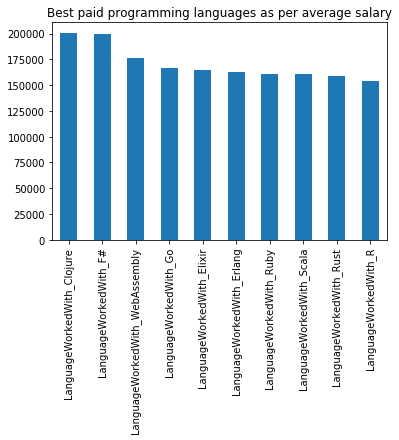

In [17]:
# Take into consideration only the columns I'm interested in, the unpacked values and the converted compensation
unpacked = df_multiple_choice_cleared.iloc[:, 84:].columns

# Use multiplication to check the salary of an individidual that is working with a given langauge
n_by_state = df_multiple_choice_cleared[unpacked].multiply(df_multiple_choice_cleared['ConvertedComp'], axis = 'index')
print(n_by_state.shape)
n_by_state  = n_by_state
pd.options.display.float_format = '{:.2f}'.format
n_by_state.where(n_by_state > 0, inplace = True)
n_by_state = n_by_state.mean()
n_by_state 
n_by_state.sort_values(ascending = False)
# Display 10 items with the biggest avarage salary
n_by_state.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', title = 'Best paid programming languages as per average salary')

# Question 3. Influence of different factors on job satisfaction

In [43]:
# Read in a fresh data-frame
df = pd.read_csv('C:\\Users\\SWOZNIA\\survey_results_public.csv')

In [100]:
#  Unpack multiple choice answers for interesting columns for influence on salary
# Create a working copy of the DF to perform operations on
working_df = df.copy()
# Select categorical columns
all_category = df.select_dtypes(include = ['object'])
cat_cols = list(all_category.columns)
# Select a column with multiple answers available I want to work with
columns_multiple_choice=['LanguageWorkedWith']
# Select categorical columns I want to take into consideration in the analysis
all_cat = ['OpenSourcer',  'WorkRemote',  'WorkLoc', 'JobSat', 'LanguageWorkedWith']
dummy_cat = ['OpenSourcer',  'WorkRemote',  'WorkLoc']


 I'm going to change the categorical values provided in the Job Satisfaction column to some numerical values that are going
 to be easier to follow

In [101]:
# Assigning a numerical value to each unique Job Satisfaction column value
value_dictionary = {'Very dissatisfied': 1, 'Slightly dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied':4, 
                   'Very satisfied': 5}
print(value_dictionary.get("Very dissatisfied"))

1


In [102]:
# Normalize the Job_Satisfaction category. Assign numerical value to the Job Satisfaction answers

for i in range(1,working_df['JobSat'].shape[0]):
    working_df.at[i,'JobSat'] = value_dictionary.get(working_df.at[i,'JobSat'])

In [103]:
# Clean the data so that no rows with NAN for the categorical columns I'm interested in are taking into account
df_multiple_choice_cleared = working_df.dropna(axis = 0, subset = all_cat)


In [104]:
# Remove columns that have not been provided in the all_cat for further investigation
for column in all_category:
    if column not in all_cat:
        df_multiple_choice_cleared = df_multiple_choice_cleared.drop(columns = column)



In [105]:
working_copy_df = df_multiple_choice_cleared.copy()
working_copy_df

,Respondent,OpenSourcer,JobSat,CompTotal,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,CodeRevHrs,LanguageWorkedWith,Age
2,3,Never,4,23000.00,8820.00,40.00,Less than once per month / Never,Home,nan,HTML/CSS,28.00
3,4,Never,4,61000.00,61000.00,80.00,Less than once per month / Never,Home,nan,C;C++;C#;Python;SQL,22.00
4,5,Once a month or more often,2,nan,nan,55.00,A few days each month,Office,nan,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,30.00
5,6,Never,4,40000.00,366420.00,15.00,A few days each month,Home,nan,Java;R;SQL,28.00
6,7,Never,3,nan,nan,32.00,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",6.00,HTML/CSS;JavaScript,42.00
...,...,...,...,...,...,...,...,...,...,...,...
88325,88878,Less than once per year,5,130000.00,130000.00,40.00,A few days each month,Office,3.00,HTML/CSS;JavaScript;Scala;TypeScript,26.00
88326,88879,Never,3,6000.00,82488.00,37.75,Less than once per month / Never,Home,10.00,Bash/Shell/PowerShell;C++;Python,34.00
88328,88881,Once a month or more often,3,60000.00,68745.00,39.00,A few days each month,Office,10.00,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScript;Python,37.00
88329,88882,Never,1,42768.00,588012.00,40.00,Less than once per month / Never,Home,5.00,C#;HTML/CSS;Java;JavaScript;PHP;Python,nan


#### Unpack multiple choice answers for Language Worked With

In [106]:
working_copy_df= unpack_multiple_choice(working_copy_df, 'LanguageWorkedWith')

{'HTML/CSS': 0, 'C': 1, 'C++': 2, 'C#': 3, 'Python': 4, 'SQL': 5, 'Java': 6, 'JavaScript': 7, 'VBA': 8, 'R': 9, 'Bash/Shell/PowerShell': 10, 'Ruby': 11, 'Rust': 12, 'TypeScript': 13, 'WebAssembly': 14, 'Other(s):': 15, 'Go': 16, 'PHP': 17, 'Swift': 18, 'Kotlin': 19, 'Objective-C': 20, 'Elixir': 21, 'Erlang': 22, 'Clojure': 23, 'Assembly': 24, 'F#': 25, 'Scala': 26, 'Dart': 27}


In [107]:
# Dummy variables for the single choice questions
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [108]:
working_copy_df

,Respondent,OpenSourcer,JobSat,CompTotal,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,CodeRevHrs,Age,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_C,LanguageWorkedWith_C++,LanguageWorkedWith_C#,LanguageWorkedWith_Python,LanguageWorkedWith_SQL,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_VBA,LanguageWorkedWith_R,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_TypeScript,LanguageWorkedWith_WebAssembly,LanguageWorkedWith_Other(s):,LanguageWorkedWith_Go,LanguageWorkedWith_PHP,LanguageWorkedWith_Swift,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Objective-C,LanguageWorkedWith_Elixir,LanguageWorkedWith_Erlang,LanguageWorkedWith_Clojure,LanguageWorkedWith_Assembly,LanguageWorkedWith_F#,LanguageWorkedWith_Scala,LanguageWorkedWith_Dart
0,3,Never,4,23000.00,8820.00,40.00,Less than once per month / Never,Home,nan,28.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,4,Never,4,61000.00,61000.00,80.00,Less than once per month / Never,Home,nan,22.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5,Once a month or more often,2,nan,nan,55.00,A few days each month,Office,nan,30.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,6,Never,4,40000.00,366420.00,15.00,A few days each month,Home,nan,28.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,7,Never,3,nan,nan,32.00,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",6.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69183,88878,Less than once per year,5,130000.00,130000.00,40.00,A few days each month,Office,3.00,26.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
69184,88879,Never,3,6000.00,82488.00,37.75,Less than once per month / Never,Home,10.00,34.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
69185,88881,Once a month or more often,3,60000.00,68745.00,39.00,A few days each month,Office,10.00,37.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
69186,88882,Never,1,42768.00,588012.00,40.00,Less than once per month / Never,Home,5.00,nan,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [109]:
# Create dummy variables for the cateogrical anserws
wrangled_df = create_dummy_df(working_copy_df,dummy_cat,False )

#### Creating a Linear model that will help to understand the most important coefficients influencing Job Satisfaction
#### As well as the impact of some specific on Job Satisfaction
#### y - is going to be the response vector which is going to be analyzed based on the 
#### X - variable used to predict the response vector


In [110]:
# Get rid of NANs for Converted Comp that is going to be the repsonse vector
# wrangled_df_converted_comp_cleaned = wrangl ed_df.dropna(subset=['JobSat'], axis = 0)
wrangled_df_converted_comp_cleaned = wrangled_df 
wrangled_df_converted_comp_cleaned = wrangled_df_converted_comp_cleaned.dropna(axis = 0)

y = wrangled_df_converted_comp_cleaned['JobSat']
X = wrangled_df_converted_comp_cleaned.drop('JobSat', axis = 1)
X = X.drop(['CompTotal'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state=42) 
# Instantiate the LinearRegression model
lm_model = LinearRegression(normalize=True) # Instantiate
# Fit the LR model to the data
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
test_score =  r2_score(y_test, y_test_preds)
train_score =  r2_score(y_train, y_train_preds)
    
print(test_score, train_score)

0.028147479165112066 0.0344088245469889


In [111]:
X

,Respondent,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_C,LanguageWorkedWith_C++,LanguageWorkedWith_C#,LanguageWorkedWith_Python,LanguageWorkedWith_SQL,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_VBA,LanguageWorkedWith_R,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_TypeScript,LanguageWorkedWith_WebAssembly,LanguageWorkedWith_Other(s):,LanguageWorkedWith_Go,LanguageWorkedWith_PHP,LanguageWorkedWith_Swift,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Objective-C,LanguageWorkedWith_Elixir,LanguageWorkedWith_Erlang,LanguageWorkedWith_Clojure,LanguageWorkedWith_Assembly,LanguageWorkedWith_F#,LanguageWorkedWith_Scala,LanguageWorkedWith_Dart,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time",WorkLoc_Office,"WorkLoc_Other place, such as a coworking space or cafe"
5,9,95179.00,32.00,12.00,23.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,1,0,1,0
7,13,90000.00,40.00,5.00,28.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0
8,14,57060.00,40.00,4.00,31.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,0,1,0,1,0
10,17,65277.00,45.00,5.00,29.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,1
12,19,31140.00,8.00,3.00,31.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69181,88876,180000.00,40.00,3.00,23.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,1,0,0,0,0,1,0,0,1,0
69182,88877,2000000.00,45.00,5.00,48.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1,0,0,0,0,0,0,1,0,1,0
69183,88878,130000.00,40.00,3.00,26.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1,0,0,0,0,0,0,0,0,1,0
69184,88879,82488.00,37.75,10.00,34.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,1,0,0,0


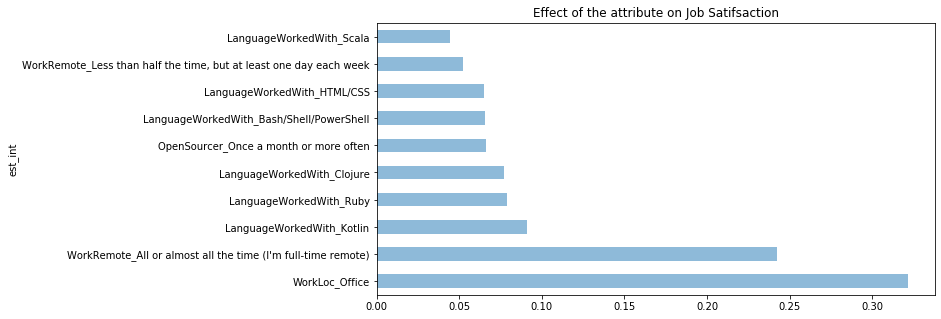

In [112]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)
test_Df = pd.DataFrame(lm_model.coef_)
pd.options.display.float_format = '{:.2f}'.format
#A quick look at the top results
coef_df.sort_values(by = 'coefs')
coef_df.head(100)# Check the general influence of coefficients
# Create a plot showing top 10 items that have the most positive impact
coef_df[['est_int','coefs']].nlargest(10, columns = ['coefs']).plot(kind = "barh", x = 'est_int', y = 'coefs', alpha=0.5, title = 'Effect of the attribute on Job Satifsaction', figsize=(10,5), legend = False)


#### Question 3 Results
Unfortunately the model and the information provided did not yeild much information,
Not finding really a strong indication what influences the job satisfaction the most, and does any specific language has 
a strong impact on job satisfaction, given the model's r^2

In [113]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.00,Man,No,Straight / Heterosexual,NaN,N